
<img src="https://dsiag.ch/images/dsi_rgb.png" alt="dsi logo" width="100" style="position: absolute; right: 0px;"/>

# Basic Cluster Analyis with scikit learn

Beispiel zur einfachen Clustering der Daten aus dem Iris Datenset mittels scikit-learn.



# Iris Datenset

## Datenset laden



In [10]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

## Drei Klassen 

In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']



| Iris Setosa      | Iris Versicolor    | Iris virginica    |
| :------------- | :----------: | -----------: |
|  ![][setosa] | ![][versicolor]   | ![][virginica]  |


Details: https://en.wikipedia.org/wiki/Iris_flower_data_set


[setosa]: https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg
[versicolor]: https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg
[virginica]: https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg




## 150x4 Datenpunkte

Merkmale sind die jeweils Länge und Breite von Sepal und Petal

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/220px-Petal-sepal.jpg)

## Datenpunkte plotten

Da das Iris Datenset aus vier Dimensionalen Daten besteht lässt es sich nicht einfach plotten. Eine Möglichkeit ist es, zwei Dimensionen auszuwählen und einen Scatter plot zu machen. Zum Beispiel wenn nur Sepal Länge und Breite berücksichtigt wird.

Zum Plotten wird die Library [matplotlib](https://matplotlib.org/) verwendet.

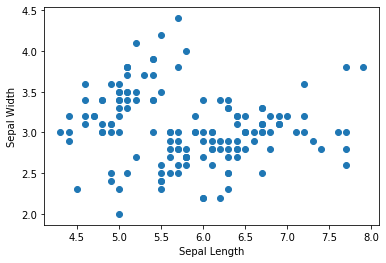

In [12]:
fig, ax = plt.subplots(1,1)

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.scatter([x[0] for x in iris.data], [x[1] for x in iris.data])

plt.show()


# K-Means Clustering

Beim [K-Means Clustering][kmeans] muss die Anzahl Cluster (n_clusters) fix gesetzt werden. Hier wird sie auf drei gesetzt, wodurch der Algorithmus die Daten in drei Cluster aufteilt


[kmeans]: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [13]:
from sklearn.cluster import KMeans

y_pred_kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(iris.data)

## Plotten der Cluster

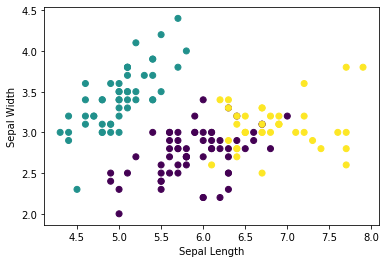

In [14]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")

plt.scatter([x[0] for x in iris.data], [x[1] for x in iris.data], c=y_pred_kmeans)
plt.show()

### Plotten der Klassen

Da für das Iris Datenset die Klassen bekannt sind können diese mit dem Clustering verglichen werden

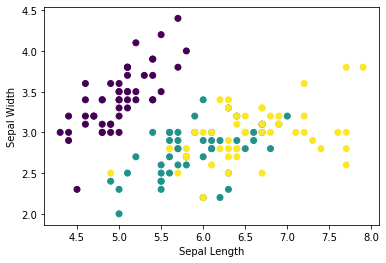

In [21]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")

plt.scatter([x[0] for x in iris.data], [x[1] for x in iris.data], c=iris.target)
plt.show()

# <span style="color:green">Aufgabe: Visualisierung prüfen

**Frage 1)** Passt das Clustering auf die bestehenden Klassen Setosa Versicolor und Virginic


**Frage 2)** Wo würden die Cluster-Grenze "von Hand" gezogen?
</span>


# Evaluation

In [16]:
from sklearn import metrics

## Rand Index

Da die Klassen bekannt ist, kann überprüft werden, ob die gefundenen Cluster mit den Klassen überein stimmen. Zum Beispiel mit dem Rand Index

In [17]:
rand_score = metrics.adjusted_rand_score(iris.target, y_pred_kmeans)
print("Rand Index für K-Means Clustering: " + str(rand_score))

Rand Index für K-Means Clustering: 0.7302382722834697


## Calinski Harabasz 

Auch wenn die Klassen nicht bekannt ist, gibt es Metriken, die die Qualität des Clusterings messen. Zum Beispiel mit  Calinski-Harabasz Index. Je grösser der Index, desto besser das Clustering.

In [18]:
metrics.calinski_harabasz_score(iris.data, y_pred_kmeans)

561.62775662962

# <span style="color:green">Bonus-Aufgabe: Hands-on </span>


- Einen anderen [Clustering Algorithmus][clustering] verwenden. Ist die Perfomance besser als K-Means?


[clustering]: https://scikit-learn.org/stable/modules/clustering.html

